# HEALTHY BREAKFAST with Linear Programming!

In [1]:
import pandas as pd
import pulp
import matplotlib.pyplot as plt
from IPython.display import Image

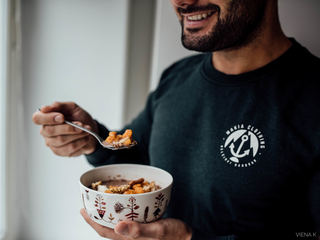

In [2]:
Image(filename='healthy_breakfast.jpg')

> CSV file has been created for the products that are going to be used in healthy and delicious porridge. All of the nutritions are considered for 1 gram of the particular product.
Price for checked on 2017-09-13 for Finland.

In [3]:
df = pd.read_csv('healthy_breakfast.csv', sep='\t')
df

,Product,Energy (kcal),Fat (g),Saturated Fat (g),Carbohydrate (g),Sugar (g),Fiber (g),Protein (g),Salt (g),Cost per 1g (euro)
0,OATMEAL,3.39,0.028,0.0050,0.602,0.009,0.133,0.116,0.0001,0.001059
1,WHEAT_BRAN,2.50,0.056,0.0100,0.110,0.020,0.490,0.140,0.0000,0.006250
2,FLAX_SEED,5.10,0.420,0.0400,0.015,0.010,0.270,0.180,0.0007,0.017500
3,CHIA_SEEDS,4.61,0.323,0.0400,0.066,0.008,0.293,0.212,0.0000,0.014000
4,SUNFLOWER_SEED,6.10,0.500,0.0500,0.130,0.020,0.060,0.230,0.0008,0.084500
5,GRANOLA,4.50,0.200,0.0930,0.520,0.100,0.160,0.110,0.0044,0.113200
6,CASHEW,5.78,0.440,0.0780,0.270,0.059,0.033,0.180,0.0003,0.166000
7,STRAWBERRIES,0.32,0.003,0.0002,0.077,0.049,0.020,0.007,0.0000,0.003200


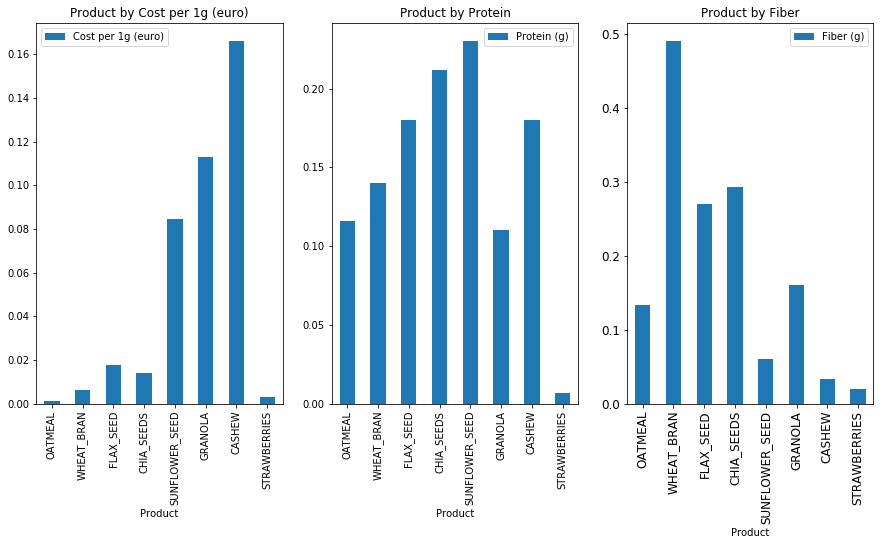

In [4]:
fig, axs = plt.subplots(1,3)
my_plot = df[['Product', 'Cost per 1g (euro)']].plot(kind='bar', 
                                                     x=df['Product'], 
                                                     title="Product by Cost per 1g (euro)",
                                                     figsize=(15, 7),
                                                     ax=axs[0])
my_plot = df[['Product', 'Protein (g)']].plot(kind='bar', 
                                              x=df['Product'], 
                                              title="Product by Protein", 
                                              figsize=(15, 7),
                                              ax=axs[1])
my_plot = df[['Product', 'Fiber (g)']].plot(kind='bar', 
                                            x=df['Product'], 
                                            title="Product by Fiber", 
                                            fontsize=12,
                                            ax=axs[2])
plt.show()

### Let's set up the LP Problem:
We can minimize or maximize any of the problem. E.g. we can minimize the cost or maximize the protein ratio in the porridge. I prefered the maximizing the protein ration instead of its price for my breakfast.

In [5]:
prob = pulp.LpProblem('HealthyBreakfast', pulp.LpMaximize)

> Let's Create Decision Variables:

Let's say that sum of all products should be 100 gram at the end. However, using lowBound and upBound, we can set minimum amount of particular product for our optimization. 

In [6]:
decision_variables = []
var_str = {}
for rownum, row in df.iterrows():
    variable = str('x' + str(rownum))
    var_str[variable] = row['Product']
    if row['Product'] == 'OATMEAL':
        variable = pulp.LpVariable(str(variable), lowBound = 40, upBound = 100, cat= 'Integer')
    elif row['Product'] == 'WHEAT_BRAN':
        variable = pulp.LpVariable(str(variable), lowBound = 2, upBound = 5, cat= 'Integer')
    elif row['Product'] == 'FLAX_SEED':
        variable = pulp.LpVariable(str(variable), lowBound = 4, upBound = 10, cat= 'Integer')
    elif row['Product'] == 'CHIA_SEEDS':
        variable = pulp.LpVariable(str(variable), lowBound = 3, upBound = 10, cat= 'Integer')
    elif row['Product'] == 'SUNFLOWER_SEED':
        variable = pulp.LpVariable(str(variable), lowBound = 5, upBound = 10, cat= 'Integer')
    elif row['Product'] == 'CASHEW':
        variable = pulp.LpVariable(str(variable), lowBound = 20, upBound = 30, cat= 'Integer')
    elif row['Product'] == 'GRANOLA':
        variable = pulp.LpVariable(str(variable), lowBound = 10, upBound = 15, cat= 'Integer')
    else:
        # This is only Strawbery for this case!!!
        variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 100, cat= 'Integer')
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))

Total number of decision_variables: 8
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7]


> Defining Objective Function: (Maximizing the Protein of The Breakfast)

In [7]:
total_protein = ""
for rownum, row in df.iterrows():
    print row
    for i, schedule in enumerate(decision_variables):
        print i, schedule
        if rownum == i:
            formula = row['Protein (g)'] * schedule
            total_protein += formula

prob += total_protein
print ("Optimization function: " + str(total_protein))

Product                OATMEAL
Energy (kcal)             3.39
Fat (g)                  0.028
Saturated Fat (g)        0.005
Carbohydrate (g)         0.602
Sugar (g)                0.009
Fiber (g)                0.133
Protein (g)              0.116
Salt (g)                0.0001
Cost per 1g (euro)    0.001059
Name: 0, dtype: object
0 x0
1 x1
2 x2
3 x3
4 x4
5 x5
6 x6
7 x7
Product               WHEAT_BRAN
Energy (kcal)                2.5
Fat (g)                    0.056
Saturated Fat (g)           0.01
Carbohydrate (g)            0.11
Sugar (g)                   0.02
Fiber (g)                   0.49
Protein (g)                 0.14
Salt (g)                       0
Cost per 1g (euro)       0.00625
Name: 1, dtype: object
0 x0
1 x1
2 x2
3 x3
4 x4
5 x5
6 x6
7 x7
Product               FLAX_SEED
Energy (kcal)               5.1
Fat (g)                    0.42
Saturated Fat (g)          0.04
Carbohydrate (g)          0.015
Sugar (g)                  0.01
Fiber (g)                  0.27
Protein (g

> Let's Define Constrains:

In [8]:
# per 1 gram of mixture of these stuff, should contain the followings
constrains = {'max_kcal': 500,
              'max_carbohydrate': 50,
              'min_protein': 15,
              'min_fiber': 5}

In [9]:
total_amount = ""
total_max_kcal = ""
total_max_carbohydrate = ""
total_min_protein = ""
total_min_fiber = ""

for rownum, row in df.iterrows():
    for i, ingredient in enumerate(decision_variables):
        if rownum == i:
            max_kcal = row['Energy (kcal)'] * ingredient
            max_carbohydrate = row['Carbohydrate (g)'] * ingredient
            min_protein = row['Protein (g)'] * ingredient
            min_fiber = row['Fiber (g)'] * ingredient
            total_max_kcal += max_kcal
            total_max_carbohydrate += max_carbohydrate
            total_min_fiber += min_fiber
            total_min_protein += min_protein
            total_amount += ingredient

prob += (total_amount == 100)
prob += (total_max_kcal <= constrains['max_kcal'])
prob += (total_min_protein > constrains['min_protein'])
prob += (total_min_fiber >= constrains['min_fiber'])

#### Final Format

In [10]:
print prob
prob.writeLP("HealthyBreakfast.lp" )

HealthyBreakfast:
MAXIMIZE
0.116*x0 + 0.14*x1 + 0.18*x2 + 0.212*x3 + 0.23*x4 + 0.11*x5 + 0.18*x6 + 0.007*x7 + 0.0
SUBJECT TO
_C1: x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 = 100

_C2: 3.39 x0 + 2.5 x1 + 5.1 x2 + 4.61 x3 + 6.1 x4 + 4.5 x5 + 5.78 x6 + 0.32 x7
 <= 500

_C3: 0.133 x0 + 0.49 x1 + 0.27 x2 + 0.293 x3 + 0.06 x4 + 0.16 x5 + 0.033 x6
 + 0.02 x7 >= 5

VARIABLES
40 <= x0 <= 100 Integer
2 <= x1 <= 5 Integer
4 <= x2 <= 10 Integer
3 <= x3 <= 10 Integer
5 <= x4 <= 10 Integer
10 <= x5 <= 15 Integer
20 <= x6 <= 30 Integer
0 <= x7 <= 100 Integer



#### Actual Optimisation:

In [11]:
optimization_result = prob.solve()
print "Status:", pulp.LpStatus[prob.status]
print "Optimal Solution to maximizing protein (Protein per 100gr): ", pulp.value(prob.objective)
print "Individual decision_variables: (USAGE of Ingredients)"
for v in prob.variables():
    print v.name, " - ", var_str[v.name], "=", v.varValue, "gram"

Status: Optimal
Optimal Solution to maximizing protein (Protein per 100gr):  15.48
Individual decision_variables: (USAGE of Ingredients)
x0  -  OATMEAL = 40.0 gram
x1  -  WHEAT_BRAN = 2.0 gram
x2  -  FLAX_SEED = 4.0 gram
x3  -  CHIA_SEEDS = 10.0 gram
x4  -  SUNFLOWER_SEED = 10.0 gram
x5  -  GRANOLA = 10.0 gram
x6  -  CASHEW = 24.0 gram
x7  -  STRAWBERRIES = 0.0 gram


## RESULT:
So, if we use the amount of ingredients stated below for the porridge, we can have maximum amount of protein for the breakfast which is 15.48 gram in this case. 
* OATMEAL = 40.0 gram
* WHEAT_BRAN = 2.0 gram
* FLAX_SEED = 4.0 gram
* CHIA_SEEDS = 10.0 gram
* SUNFLOWER_SEED = 10.0 gram
* GRANOLA = 10.0 gram
* CASHEW = 24.0 gram
* STRAWBERRIES = 0.0 gram

**FYI: You will need to use Milk/OatMilk/HotWater for the mixture. It was ignored in this calculation. Thus, If you are going to use a milk for this it will also increase the amount of protein.**